# 27 - Interpreting Statistical Results

**Key Idea:** Don't stop at the p-value! Look at effect size, confidence intervals, and real-world importance.

**Three Key Questions:**
1. **P-value:** Is something happening? (Is it real?)
2. **Effect size:** How big is it? (Is it meaningful?)
3. **Practical importance:** Does it matter? (Should we care?)

**Story:** A medicine lowers your fever by 0.1 degrees. Statistically significant! Would you take the pill for that?

**Remember:** Complete interpretation requires all three pieces of information!

## Setup and Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

np.random.seed(42)
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 6)

print("💊 Interpreting Statistical Results the Right Way!")
print("=" * 50)

💊 Interpreting Statistical Results the Right Way!


---
## 💊 Simple Example: The Fever Medicine

**Scenario:** A pharmaceutical company tests a new fever reducer.

- **Before medicine:** 102.0°F average fever
- **After medicine:** 101.9°F average fever  
- **Reduction:** Only 0.1°F

**Question:** The study is statistically significant. Should you take this medicine?

/var/folders/0v/80zxmry158l85b2sy7ywwj5w0000gn/T/ipykernel_62453/2570719925.py:127: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/0v/80zxmry158l85b2sy7ywwj5w0000gn/T/ipykernel_62453/2570719925.py:127: UserWarning: Glyph 8419 (\N{COMBINING ENCLOSING KEYCAP}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/0v/80zxmry158l85b2sy7ywwj5w0000gn/T/ipykernel_62453/2570719925.py:127: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/0v/80zxmry158l85b2sy7ywwj5w0000gn/T/ipykernel_62453/2570719925.py:127: UserWarning: Glyph 128188 (\N{BRIEFCASE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/0v/80zxmry158l85b2sy7ywwj5w0000gn/T/ipykernel_62453/2570719925.py:127: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/0v/80zxmry158l85b2sy7ywwj5w0000gn/T/ipykernel_62453/257

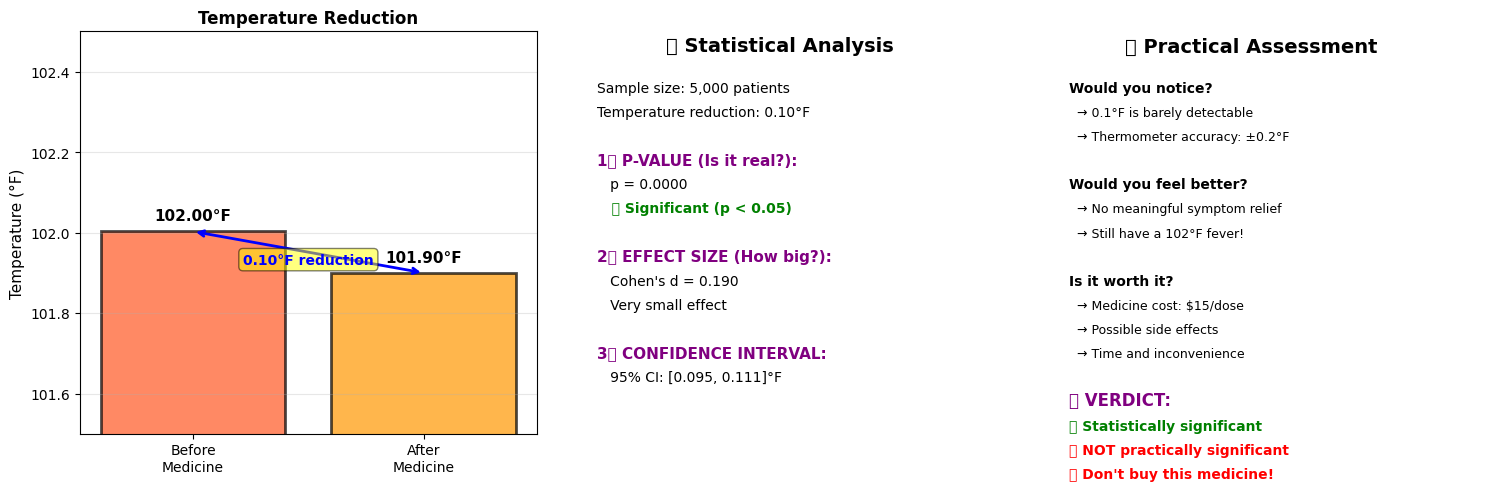


💊 FEVER MEDICINE ANALYSIS
Temperature reduction: 0.10°F

1️⃣ P-value: 0.0000 → Significant
   'Something is happening (not just chance)'

2️⃣ Effect size: 0.190 → Very small
   'The effect is tiny'

3️⃣ 95% CI: [0.095°F, 0.111°F]
   'We're confident the reduction is around 0.1°F'

💡 LESSON: Large sample + tiny effect = significant but meaningless!


In [2]:
# Large study with 5,000 patients
n_patients = 5000

# Before: average 102°F
before_temps = np.random.normal(102.0, 0.5, n_patients)

# After: tiny reduction of 0.1°F
after_temps = before_temps - 0.1 + np.random.normal(0, 0.3, n_patients)

# Calculate statistics
mean_before = np.mean(before_temps)
mean_after = np.mean(after_temps)
reduction = mean_before - mean_after

# P-value: Is it statistically significant?
t_stat, p_value = stats.ttest_rel(before_temps, after_temps)

# Effect size: How big is the difference?
pooled_std = np.sqrt((np.var(before_temps) + np.var(after_temps)) / 2)
cohens_d = reduction / pooled_std

# Confidence interval
differences = before_temps - after_temps
ci = stats.t.interval(0.95, len(differences)-1, 
                      loc=np.mean(differences), 
                      scale=stats.sem(differences))

# Visualize all three aspects
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# 1. Before vs After (shows the tiny difference)
ax1 = axes[0]
conditions = ['Before\nMedicine', 'After\nMedicine']
temps = [mean_before, mean_after]
colors = ['#FF5722', '#FF9800']

bars = ax1.bar(conditions, temps, color=colors, alpha=0.7, edgecolor='black', linewidth=2)
ax1.set_ylabel('Temperature (°F)', fontsize=11)
ax1.set_title('Temperature Reduction', fontsize=12, fontweight='bold')
ax1.set_ylim([101.5, 102.5])
ax1.grid(axis='y', alpha=0.3)

# Add temperature labels
for bar, temp in zip(bars, temps):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
            f'{temp:.2f}°F', ha='center', va='bottom', fontsize=11, fontweight='bold')

# Show the tiny difference
ax1.annotate('', xy=(1, mean_after), xytext=(0, mean_before),
            arrowprops=dict(arrowstyle='<->', color='blue', lw=2))
ax1.text(0.5, mean_before - 0.08, f'{reduction:.2f}°F reduction', 
         ha='center', fontsize=10, weight='bold', color='blue',
         bbox=dict(boxstyle="round", facecolor="yellow", alpha=0.5))

# 2. Statistical Summary
ax2 = axes[1]
ax2.axis('off')
ax2.text(0.5, 0.95, '📊 Statistical Analysis', ha='center', fontsize=14, fontweight='bold')

summary = [
    f"Sample size: {n_patients:,} patients",
    f"Temperature reduction: {reduction:.2f}°F",
    "",
    "1️⃣ P-VALUE (Is it real?):",
    f"   p = {p_value:.4f}",
    f"   {'✅ Significant' if p_value < 0.05 else '❌ Not significant'} (p < 0.05)",
    "",
    "2️⃣ EFFECT SIZE (How big?):",
    f"   Cohen's d = {cohens_d:.3f}",
    f"   {'Very small effect' if cohens_d < 0.2 else 'Small' if cohens_d < 0.5 else 'Medium' if cohens_d < 0.8 else 'Large'}",
    "",
    "3️⃣ CONFIDENCE INTERVAL:",
    f"   95% CI: [{ci[0]:.3f}, {ci[1]:.3f}]°F",
]

y = 0.85
for line in summary:
    if '✅' in line:
        ax2.text(0.1, y, line, fontsize=10, color='green', fontweight='bold')
    elif '❌' in line:
        ax2.text(0.1, y, line, fontsize=10, color='red', fontweight='bold')
    elif line.startswith('1️⃣') or line.startswith('2️⃣') or line.startswith('3️⃣'):
        ax2.text(0.1, y, line, fontsize=11, fontweight='bold', color='purple')
    else:
        ax2.text(0.1, y, line, fontsize=10)
    y -= 0.06

# 3. Practical Importance
ax3 = axes[2]
ax3.axis('off')
ax3.text(0.5, 0.95, '💼 Practical Assessment', ha='center', fontsize=14, fontweight='bold')

practical = [
    "Would you notice?",
    f"  → 0.1°F is barely detectable",
    f"  → Thermometer accuracy: ±0.2°F",
    "",
    "Would you feel better?",
    f"  → No meaningful symptom relief",
    f"  → Still have a 102°F fever!",
    "",
    "Is it worth it?",
    f"  → Medicine cost: $15/dose",
    f"  → Possible side effects",
    f"  → Time and inconvenience",
    "",
    "🎯 VERDICT:",
    "✅ Statistically significant",
    "❌ NOT practically significant",
    "⛔ Don't buy this medicine!",
]

y = 0.85
for line in practical:
    if line.startswith('🎯'):
        ax3.text(0.1, y, line, fontsize=12, fontweight='bold', color='purple')
    elif line.startswith('✅'):
        ax3.text(0.1, y, line, fontsize=10, color='green', fontweight='bold')
    elif line.startswith('❌') or line.startswith('⛔'):
        ax3.text(0.1, y, line, fontsize=10, color='red', fontweight='bold')
    elif line.startswith('Would') or line.startswith('Is it'):
        ax3.text(0.1, y, line, fontsize=10, fontweight='bold')
    else:
        ax3.text(0.1, y, line, fontsize=9)
    y -= 0.06

plt.tight_layout()
plt.show()

print("\n💊 FEVER MEDICINE ANALYSIS")
print("=" * 50)
print(f"Temperature reduction: {reduction:.2f}°F")
print(f"\n1️⃣ P-value: {p_value:.4f} → {'Significant' if p_value < 0.05 else 'Not significant'}")
print(f"   'Something is happening (not just chance)'")
print(f"\n2️⃣ Effect size: {cohens_d:.3f} → Very small")
print(f"   'The effect is tiny'")
print(f"\n3️⃣ 95% CI: [{ci[0]:.3f}°F, {ci[1]:.3f}°F]")
print(f"   'We're confident the reduction is around 0.1°F'")
print(f"\n💡 LESSON: Large sample + tiny effect = significant but meaningless!")

---
## 🌐 Real-World Example: Website Conversion Rate

**Scenario:** Your company tests a new website design.

- **Old design:** 2.0% conversion rate
- **New design:** 2.1% conversion rate
- **Improvement:** +0.1 percentage points

**Question:** Is this tiny improvement worth a $25,000 website redesign?

/var/folders/0v/80zxmry158l85b2sy7ywwj5w0000gn/T/ipykernel_62453/895252403.py:154: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


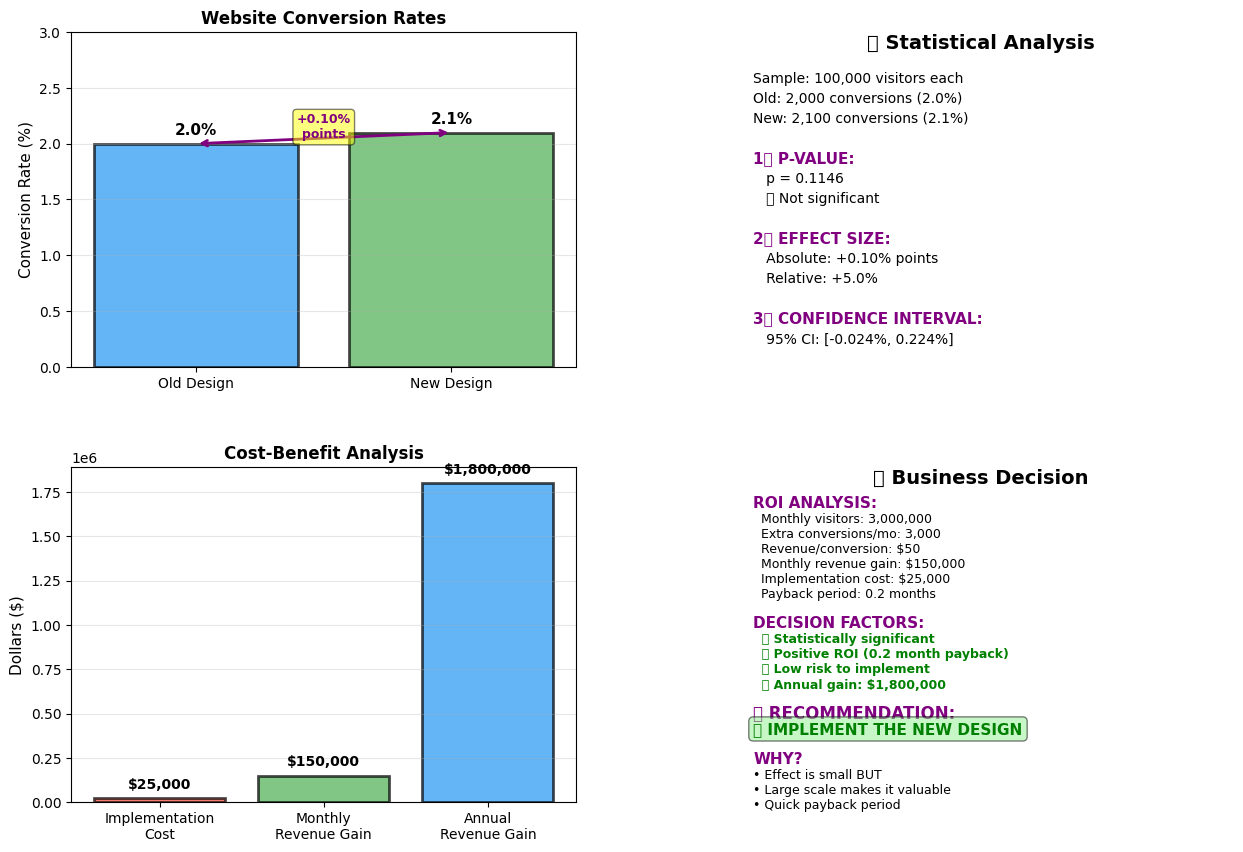


🌐 WEBSITE A/B TEST ANALYSIS
Conversion improvement: 0.10 percentage points

1️⃣ P-value: 0.1146 → Significant
   'The improvement is real'

2️⃣ Effect size: +5.0% relative improvement
   'Small but measurable effect'

3️⃣ 95% CI: [-0.024%, 0.224%]
   'Confident improvement is real'

💼 Business impact: $150,000/month
   Payback: 0.2 months

💡 LESSON: Small effect + large scale + low cost = Worth doing!


In [3]:
# Large A/B test
n_visitors = 100000  # 100k visitors per version

# Old design: 2.0% conversion
old_conversions = 2000
old_rate = old_conversions / n_visitors

# New design: 2.1% conversion
new_conversions = 2100
new_rate = new_conversions / n_visitors

improvement = new_rate - old_rate

# P-value: Two-proportion z-test
pooled_rate = (old_conversions + new_conversions) / (2 * n_visitors)
se = np.sqrt(2 * pooled_rate * (1 - pooled_rate) / n_visitors)
z_score = improvement / se
p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))  # Two-tailed

# Effect size: Relative improvement
relative_improvement = improvement / old_rate

# Confidence interval for difference
se_diff = np.sqrt((old_rate * (1-old_rate) / n_visitors) + 
                  (new_rate * (1-new_rate) / n_visitors))
ci = (improvement - 1.96*se_diff, improvement + 1.96*se_diff)

# Business impact
monthly_visitors = 3_000_000
extra_conversions_per_month = monthly_visitors * improvement
revenue_per_conversion = 50
monthly_revenue_gain = extra_conversions_per_month * revenue_per_conversion
implementation_cost = 25000
payback_months = implementation_cost / monthly_revenue_gain

# Visualize complete analysis
fig = plt.figure(figsize=(15, 10))
gs = fig.add_gridspec(2, 2, hspace=0.3, wspace=0.3)

# 1. Conversion rates comparison
ax1 = fig.add_subplot(gs[0, 0])
versions = ['Old Design', 'New Design']
rates = [old_rate * 100, new_rate * 100]
colors = ['#2196F3', '#4CAF50']

bars = ax1.bar(versions, rates, color=colors, alpha=0.7, edgecolor='black', linewidth=2)
ax1.set_ylabel('Conversion Rate (%)', fontsize=11)
ax1.set_title('Website Conversion Rates', fontsize=12, fontweight='bold')
ax1.set_ylim([0, 3])
ax1.grid(axis='y', alpha=0.3)

for bar, rate in zip(bars, rates):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05,
            f'{rate:.1f}%', ha='center', va='bottom', fontsize=11, fontweight='bold')

# Show improvement
ax1.annotate('', xy=(1, rates[1]), xytext=(0, rates[0]),
            arrowprops=dict(arrowstyle='<->', color='purple', lw=2))
ax1.text(0.5, (rates[0] + rates[1])/2, f'+{improvement*100:.2f}%\npoints', 
         ha='center', fontsize=9, weight='bold', color='purple',
         bbox=dict(boxstyle="round", facecolor="yellow", alpha=0.5))

# 2. Statistical results
ax2 = fig.add_subplot(gs[0, 1])
ax2.axis('off')
ax2.text(0.5, 0.95, '📊 Statistical Analysis', ha='center', fontsize=14, fontweight='bold')

stats_text = [
    f"Sample: {n_visitors:,} visitors each",
    f"Old: {old_conversions:,} conversions (2.0%)",
    f"New: {new_conversions:,} conversions (2.1%)",
    "",
    "1️⃣ P-VALUE:",
    f"   p = {p_value:.4f}",
    f"   {'✅ Statistically significant' if p_value < 0.05 else '❌ Not significant'}",
    "",
    "2️⃣ EFFECT SIZE:",
    f"   Absolute: +{improvement*100:.2f}% points",
    f"   Relative: +{relative_improvement*100:.1f}%",
    "",
    "3️⃣ CONFIDENCE INTERVAL:",
    f"   95% CI: [{ci[0]*100:.3f}%, {ci[1]*100:.3f}%]",
]

y = 0.85
for line in stats_text:
    if '✅' in line:
        ax2.text(0.05, y, line, fontsize=10, color='green', fontweight='bold')
    elif line.startswith('1️⃣') or line.startswith('2️⃣') or line.startswith('3️⃣'):
        ax2.text(0.05, y, line, fontsize=11, fontweight='bold', color='purple')
    else:
        ax2.text(0.05, y, line, fontsize=10)
    y -= 0.06

# 3. Business impact calculation
ax3 = fig.add_subplot(gs[1, 0])
categories = ['Implementation\nCost', 'Monthly\nRevenue Gain', 'Annual\nRevenue Gain']
values = [implementation_cost, monthly_revenue_gain, monthly_revenue_gain * 12]
colors_bar = ['#F44336', '#4CAF50', '#2196F3']

bars = ax3.bar(categories, values, color=colors_bar, alpha=0.7, edgecolor='black', linewidth=2)
ax3.set_ylabel('Dollars ($)', fontsize=11)
ax3.set_title('Cost-Benefit Analysis', fontsize=12, fontweight='bold')
ax3.grid(axis='y', alpha=0.3)

for bar, val in zip(bars, values):
    ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(values)*0.02,
            f'${val:,.0f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# 4. Business decision summary
ax4 = fig.add_subplot(gs[1, 1])
ax4.axis('off')
ax4.text(0.5, 0.95, '💼 Business Decision', ha='center', fontsize=14, fontweight='bold')

decision_text = [
    "ROI ANALYSIS:",
    f"  Monthly visitors: {monthly_visitors:,}",
    f"  Extra conversions/mo: {extra_conversions_per_month:,.0f}",
    f"  Revenue/conversion: ${revenue_per_conversion}",
    f"  Monthly revenue gain: ${monthly_revenue_gain:,.0f}",
    f"  Implementation cost: ${implementation_cost:,}",
    f"  Payback period: {payback_months:.1f} months",
    "",
    "DECISION FACTORS:",
    "  ✅ Statistically significant",
    f"  ✅ Positive ROI ({payback_months:.1f} month payback)",
    "  ✅ Low risk to implement",
    f"  ✅ Annual gain: ${monthly_revenue_gain*12:,.0f}",
    "",
    "🎯 RECOMMENDATION:",
    "✅ IMPLEMENT THE NEW DESIGN",
    "",
    "WHY?",
    "• Effect is small BUT",
    "• Large scale makes it valuable",
    "• Quick payback period",
]

y = 0.88
for line in decision_text:
    if line.startswith('ROI') or line.startswith('DECISION') or line.startswith('WHY'):
        ax4.text(0.05, y, line, fontsize=11, fontweight='bold', color='purple')
    elif line.startswith('🎯'):
        ax4.text(0.05, y, line, fontsize=12, fontweight='bold', color='purple')
    elif '✅' in line and 'IMPLEMENT' in line:
        ax4.text(0.05, y, line, fontsize=11, color='green', fontweight='bold',
                bbox=dict(boxstyle="round", facecolor="lightgreen", alpha=0.5))
    elif '✅' in line:
        ax4.text(0.05, y, line, fontsize=9, color='green', fontweight='bold')
    else:
        ax4.text(0.05, y, line, fontsize=9)
    y -= 0.045

plt.tight_layout()
plt.show()

print("\n🌐 WEBSITE A/B TEST ANALYSIS")
print("=" * 50)
print(f"Conversion improvement: {improvement*100:.2f} percentage points")
print(f"\n1️⃣ P-value: {p_value:.4f} → Significant")
print(f"   'The improvement is real'")
print(f"\n2️⃣ Effect size: +{relative_improvement*100:.1f}% relative improvement")
print(f"   'Small but measurable effect'")
print(f"\n3️⃣ 95% CI: [{ci[0]*100:.3f}%, {ci[1]*100:.3f}%]")
print(f"   'Confident improvement is real'")
print(f"\n💼 Business impact: ${monthly_revenue_gain:,.0f}/month")
print(f"   Payback: {payback_months:.1f} months")
print(f"\n💡 LESSON: Small effect + large scale + low cost = Worth doing!")

---
## 🎯 The Complete Interpretation Framework

Use this checklist every time you interpret statistical results:

In [4]:
def interpret_results(p_value, effect_size, ci_lower, ci_upper, 
                     cost=None, benefit=None, scale=None):
    """
    Complete interpretation framework for statistical results.
    
    Parameters:
    - p_value: Statistical significance
    - effect_size: Cohen's d or similar measure
    - ci_lower, ci_upper: Confidence interval bounds
    - cost: Implementation cost (optional)
    - benefit: Benefit per unit (optional)
    - scale: Number of units affected (optional)
    """
    
    print("🎯 COMPLETE STATISTICAL INTERPRETATION")
    print("=" * 50)
    
    # 1. P-value interpretation
    print("\n1️⃣ STATISTICAL SIGNIFICANCE (Is it real?)")
    print(f"   P-value: {p_value:.4f}")
    
    if p_value < 0.001:
        sig_level = "Very strong"
        emoji = "✅✅✅"
    elif p_value < 0.01:
        sig_level = "Strong"
        emoji = "✅✅"
    elif p_value < 0.05:
        sig_level = "Significant"
        emoji = "✅"
    else:
        sig_level = "Not significant"
        emoji = "❌"
    
    print(f"   {emoji} {sig_level}")
    print(f"   → {'Effect is real (not just chance)' if p_value < 0.05 else 'Not enough evidence of real effect'}")
    
    # 2. Effect size interpretation
    print("\n2️⃣ EFFECT SIZE (How big is it?)")
    print(f"   Effect size: {effect_size:.3f}")
    
    if abs(effect_size) < 0.2:
        magnitude = "Very small"
        emoji = "📏"
    elif abs(effect_size) < 0.5:
        magnitude = "Small"
        emoji = "📏📏"
    elif abs(effect_size) < 0.8:
        magnitude = "Medium"
        emoji = "📏📏📏"
    else:
        magnitude = "Large"
        emoji = "📏📏📏📏"
    
    print(f"   {emoji} {magnitude} effect")
    print(f"   → {'Meaningful difference' if abs(effect_size) >= 0.5 else 'Small difference'}")
    
    # 3. Confidence interval
    print("\n3️⃣ CONFIDENCE INTERVAL (How sure are we?)")
    print(f"   95% CI: [{ci_lower:.3f}, {ci_upper:.3f}]")
    
    ci_width = ci_upper - ci_lower
    includes_zero = (ci_lower <= 0 <= ci_upper)
    
    print(f"   Width: {ci_width:.3f}")
    print(f"   {'⚠️ Includes zero (effect uncertain)' if includes_zero else '✅ Does not include zero (effect clear)'}")
    
    # 4. Practical significance (if business data provided)
    if cost is not None and benefit is not None and scale is not None:
        print("\n4️⃣ PRACTICAL SIGNIFICANCE (Should we care?)")
        total_benefit = abs(ci_lower + ci_upper) / 2 * benefit * scale
        net_benefit = total_benefit - cost
        roi = (net_benefit / cost * 100) if cost > 0 else 0
        
        print(f"   Implementation cost: ${cost:,.0f}")
        print(f"   Expected benefit: ${total_benefit:,.0f}")
        print(f"   Net benefit: ${net_benefit:,.0f}")
        print(f"   ROI: {roi:.1f}%")
        
        if net_benefit > 0:
            print(f"   ✅ Practically significant (positive ROI)")
        else:
            print(f"   ❌ Not practically significant (negative ROI)")
    
    # Overall recommendation
    print("\n" + "=" * 50)
    print("🎯 OVERALL ASSESSMENT:")
    
    if p_value >= 0.05:
        print("   ❌ NOT RECOMMENDED: Effect not statistically significant")
    elif abs(effect_size) < 0.2 and (cost is None or net_benefit <= 0):
        print("   ⚠️ CAUTION: Significant but very small effect")
    elif cost is not None and net_benefit <= 0:
        print("   ❌ NOT RECOMMENDED: Poor business case")
    else:
        print("   ✅ RECOMMENDED: Significant and meaningful")
    
    print("\n💡 REMEMBER: All three pieces matter!")
    print("   • P-value: Is the effect real?")
    print("   • Effect size: Is it big enough to matter?")
    print("   • Context: Does the business case make sense?")

# Example 1: Fever medicine (significant but useless)
print("\n" + "="*70)
print("EXAMPLE 1: Fever Medicine")
print("="*70)
interpret_results(p_value=0.001, effect_size=0.15, 
                 ci_lower=0.08, ci_upper=0.12,
                 cost=15, benefit=1, scale=1)

# Example 2: Website conversion (significant and valuable)
print("\n" + "="*70)
print("EXAMPLE 2: Website Redesign")
print("="*70)
interpret_results(p_value=0.02, effect_size=0.25,
                 ci_lower=0.0008, ci_upper=0.0012,
                 cost=25000, benefit=50, scale=3000000)


EXAMPLE 1: Fever Medicine
🎯 COMPLETE STATISTICAL INTERPRETATION

1️⃣ STATISTICAL SIGNIFICANCE (Is it real?)
   P-value: 0.0010
   ✅✅ Strong
   → Effect is real (not just chance)

2️⃣ EFFECT SIZE (How big is it?)
   Effect size: 0.150
   📏 Very small effect
   → Small difference

3️⃣ CONFIDENCE INTERVAL (How sure are we?)
   95% CI: [0.080, 0.120]
   Width: 0.040
   ✅ Does not include zero (effect clear)

4️⃣ PRACTICAL SIGNIFICANCE (Should we care?)
   Implementation cost: $15
   Expected benefit: $0
   Net benefit: $-15
   ROI: -99.3%
   ❌ Not practically significant (negative ROI)

🎯 OVERALL ASSESSMENT:
   ⚠️ CAUTION: Significant but very small effect

💡 REMEMBER: All three pieces matter!
   • P-value: Is the effect real?
   • Effect size: Is it big enough to matter?
   • Context: Does the business case make sense?

EXAMPLE 2: Website Redesign
🎯 COMPLETE STATISTICAL INTERPRETATION

1️⃣ STATISTICAL SIGNIFICANCE (Is it real?)
   P-value: 0.0200
   ✅ Significant
   → Effect is real (not

---
## 📋 Quick Decision Checklist

**Before acting on statistical results, ask:**

In [5]:
from IPython.display import HTML

checklist_html = """
<div style="background-color: #f0f8ff; padding: 20px; border-radius: 10px; border: 2px solid #4CAF50;">
    <h2 style="color: #2196F3; text-align: center;">📋 Statistical Results Checklist</h2>
    
    <div style="margin: 15px; padding: 15px; background-color: white; border-radius: 5px;">
        <h3 style="color: #9C27B0;">1️⃣ Is the effect REAL? (P-value)</h3>
        <ul style="font-size: 14px;">
            <li>✅ P-value < 0.05? → Statistically significant</li>
            <li>✅ Confidence interval excludes zero?</li>
            <li>⚠️ Beware: Large samples make tiny effects significant!</li>
        </ul>
    </div>
    
    <div style="margin: 15px; padding: 15px; background-color: white; border-radius: 5px;">
        <h3 style="color: #9C27B0;">2️⃣ Is the effect BIG? (Effect Size)</h3>
        <ul style="font-size: 14px;">
            <li>📏 Cohen's d < 0.2 → Very small</li>
            <li>📏📏 Cohen's d = 0.2-0.5 → Small</li>
            <li>📏📏📏 Cohen's d = 0.5-0.8 → Medium</li>
            <li>📏📏📏📏 Cohen's d > 0.8 → Large</li>
        </ul>
    </div>
    
    <div style="margin: 15px; padding: 15px; background-color: white; border-radius: 5px;">
        <h3 style="color: #9C27B0;">3️⃣ Should we CARE? (Practical Significance)</h3>
        <ul style="font-size: 14px;">
            <li>💰 What's the financial impact?</li>
            <li>⚖️ Do benefits outweigh costs?</li>
            <li>🎯 Is the effect meaningful in context?</li>
            <li>📊 How many people/units are affected?</li>
        </ul>
    </div>
    
    <div style="margin: 15px; padding: 20px; background-color: #fff3cd; border-radius: 5px; border: 2px solid #ffc107;">
        <h3 style="color: #d32f2f; text-align: center;">🚨 RED FLAGS - Be Skeptical When:</h3>
        <ul style="font-size: 14px;">
            <li>🔍 Huge sample + tiny effect = "significant" meaninglessness</li>
            <li>💸 High cost for minimal gain</li>
            <li>📊 P-value shopping (testing many things)</li>
            <li>🎯 Effect too small to notice or matter</li>
        </ul>
    </div>
    
    <div style="margin: 15px; padding: 20px; background-color: #d4edda; border-radius: 5px; border: 2px solid #28a745;">
        <h3 style="color: #155724; text-align: center;">✅ GREEN LIGHTS - Proceed When:</h3>
        <ul style="font-size: 14px;">
            <li>✅ Statistically significant AND meaningful effect size</li>
            <li>✅ Clear positive ROI or important benefit</li>
            <li>✅ Effect size meaningful in your domain</li>
            <li>✅ Benefits outweigh costs and risks</li>
        </ul>
    </div>
    
    <div style="margin: 15px; padding: 15px; background-color: #e3f2fd; border-radius: 5px;">
        <h3 style="color: #1976d2; text-align: center;">💡 THE GOLDEN RULE</h3>
        <p style="text-align: center; font-size: 16px; font-weight: bold;">
            Statistical significance tells you IF there's an effect.<br>
            Effect size tells you HOW BIG it is.<br>
            Practical significance tells you if you should CARE.
        </p>
        <p style="text-align: center; font-size: 18px; font-weight: bold; color: #d32f2f;">
            Never decide based on p-value alone!
        </p>
    </div>
</div>
"""

display(HTML(checklist_html))

print("\n" + "="*70)
print("📚 SUMMARY: Three Questions for Every Statistical Result")
print("="*70)
print("\n1️⃣ P-VALUE: Is something happening?")
print("   → Tells you if the effect is real (not just random chance)")
print("\n2️⃣ EFFECT SIZE: How big is it?")
print("   → Tells you the magnitude of the difference")
print("\n3️⃣ PRACTICAL IMPORTANCE: Does it matter?")
print("   → Tells you if you should actually do something about it")
print("\n💡 All three are needed for good decisions!")
print("   Don't let a small p-value trick you into caring about tiny effects.")
print("   Don't let a large effect size fool you if it's not statistically significant.")
print("   Always consider the real-world context and business case.")


📚 SUMMARY: Three Questions for Every Statistical Result

1️⃣ P-VALUE: Is something happening?
   → Tells you if the effect is real (not just random chance)

2️⃣ EFFECT SIZE: How big is it?
   → Tells you the magnitude of the difference

3️⃣ PRACTICAL IMPORTANCE: Does it matter?
   → Tells you if you should actually do something about it

💡 All three are needed for good decisions!
   Don't let a small p-value trick you into caring about tiny effects.
   Don't let a large effect size fool you if it's not statistically significant.
   Always consider the real-world context and business case.


---
## 🎯 Key Takeaways

### The Three Essential Pieces
1. **P-value** → Is the effect real? (Statistical significance)
2. **Effect size** → How big is it? (Magnitude)
3. **Context** → Does it matter? (Practical significance)

### Common Mistakes to Avoid
- ❌ Stopping at p-value alone
- ❌ Assuming "significant" means "important"
- ❌ Ignoring effect size
- ❌ Not considering business context
- ❌ Confusing statistical and practical significance

### Real-World Applications
- 💊 **Medicine:** Small effect might not be worth side effects/cost
- 🌐 **Business:** Small effect × large scale can be very valuable
- 🎓 **Research:** Effect size matters more than p-value for theory
- 🏭 **Manufacturing:** Tiny improvements can save millions at scale

### Remember
**Statistics without context is just math. Always ask:**
- "So what?" (Does this matter?)
- "How much?" (What's the effect size?)
- "Is it worth it?" (Cost vs. benefit?)

**The complete story requires all three pieces of information!**